In [1]:
!pip install opencv-python matplotlib scikit-learn tensorflow


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


🔍 Verificando pastas:
   ➕ Positive folder: c:\Users\rafae\Downloads\trabalho-pdi-final\src\dataset\Positive
   ➖ Negative folder: c:\Users\rafae\Downloads\trabalho-pdi-final\src\dataset\Negative


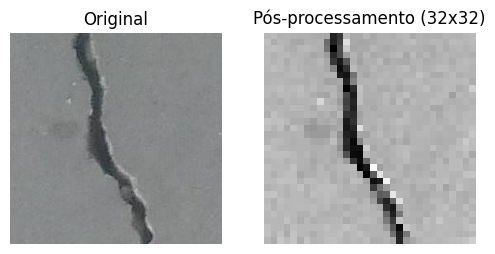

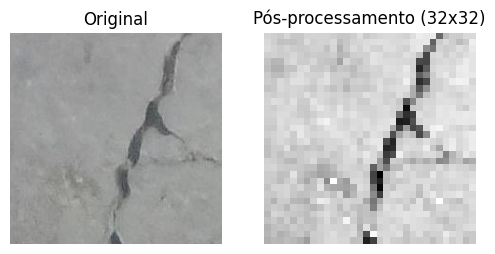

✅ Dataset carregado. Shape: (40000, 32, 32, 1), Distribuição de classes: [20000 20000]


c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_28            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_29            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,941 (238.05 KB)

 Trainable params: 60,941 (238.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7582 - loss: 0.5072 - val_accuracy: 0.8698 - val_loss: 0.3215
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9052 - loss: 0.2585 - val_accuracy: 0.9308 - val_loss: 0.1900
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9375 - loss: 0.1762 - val_accuracy: 0.9488 - val_loss: 0.1433
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9520 - loss: 0.1349 - val_accuracy: 0.9552 - val_loss: 0.1218
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9529 - loss: 0.1254 - val_accuracy: 0.9586 - val_loss: 0.1098
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9612 - loss: 0.1094 - val_accuracy: 0.9633 - val_loss: 0.1036
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9662 - loss: 0.0965 - val_accuracy: 0.9653 - val_loss: 0.0949
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9680 - loss: 0.0883 - val_accuracy: 0.

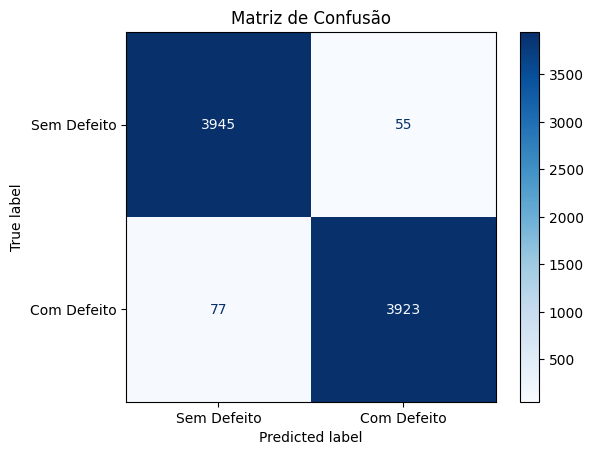

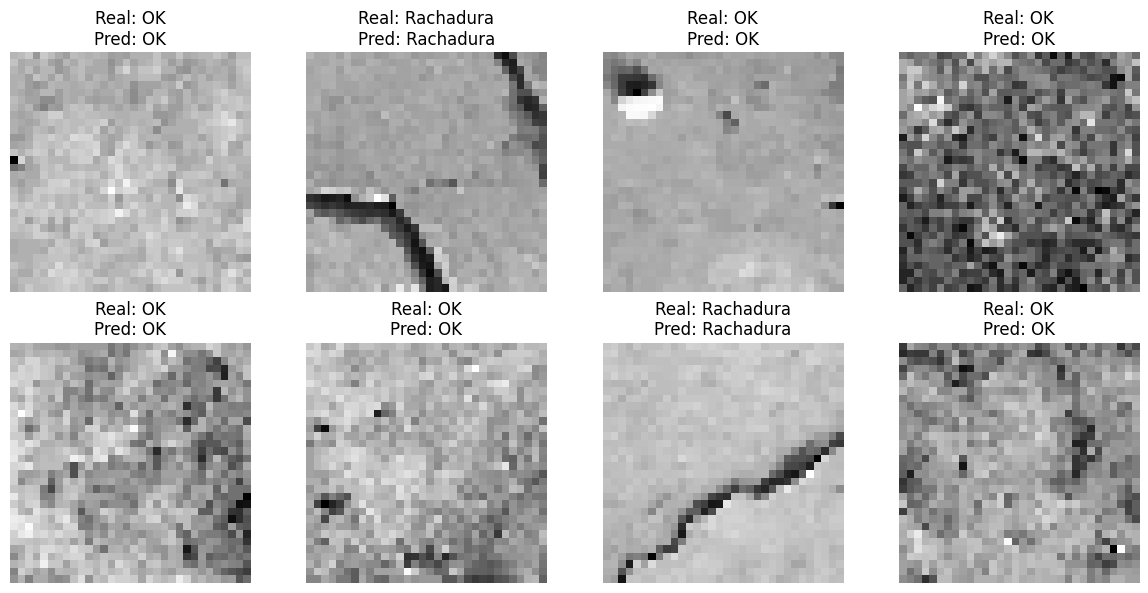

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# FUNÇÃO DE PRÉ-PROCESSAMENTO (MODIFICADA PARA LeNet-5)
# -------------------------------
def preprocess_image(img):
    """
    Prepara a imagem para a LeNet-5:
    1. Redimensiona para 32x32 pixels.
    2. Converte para escala de cinza.
    3. Adiciona uma dimensão de canal (32, 32, 1).
    4. Normaliza os pixels para o intervalo [0, 1].
    """
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Adiciona a dimensão do canal para o Keras
    img = np.expand_dims(img, axis=-1) 
    # Normaliza para [0, 1]
    img = img.astype(np.float32) / 255.0
    return img

def load_and_preprocess(pos_folder, neg_folder, n_each=50):
    imgs, lbls = [], []

    print(f"🔍 Verificando pastas:")
    print(f"   ➕ Positive folder: {os.path.abspath(pos_folder)}")
    print(f"   ➖ Negative folder: {os.path.abspath(neg_folder)}")

    pos_files = sorted([f for f in os.listdir(pos_folder) if f.lower().endswith(('.jpg','.png','.jpeg'))])[:n_each]
    neg_files = sorted([f for f in os.listdir(neg_folder) if f.lower().endswith(('.jpg','.png','.jpeg'))])[:n_each]

    def _process_list(folder, files, label):
        for fname in files:
            path = os.path.join(folder, fname)
            img_original = cv2.imread(path)
            if img_original is None:
                print(f"⚠️ Imagem não carregada: {path}")
                continue

            img_processed = preprocess_image(img_original)
            
            # Mostra as duas primeiras imagens (original e processada) para verificação
            if len(imgs) < 2:
                plt.figure(figsize=(6,3))
                plt.subplot(1,2,1)
                plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
                plt.title("Original")
                plt.axis('off')

                plt.subplot(1,2,2)
                # Para exibir a imagem em escala de cinza, removemos a última dimensão
                plt.imshow(img_processed.squeeze(), cmap='gray')
                plt.title("Pós-processamento (32x32)")
                plt.axis('off')
                plt.show()

            imgs.append(img_processed)
            lbls.append(label)

    _process_list(pos_folder, pos_files, 1) # 1 para 'Com Defeito'
    _process_list(neg_folder, neg_files, 0) # 0 para 'Sem Defeito'

    return np.array(imgs), np.array(lbls)


# -------------------------------
# CARREGAMENTO DO DATASET
# -------------------------------
# ATENÇÃO: Verifique se este é o caminho correto para suas pastas
pos_dir = 'dataset/Positive'
neg_dir = 'dataset/Negative'

if not os.path.isdir(pos_dir):
    raise FileNotFoundError(f"❌ Diretório não encontrado: {os.path.abspath(pos_dir)}")
if not os.path.isdir(neg_dir):
    raise FileNotFoundError(f"❌ Diretório não encontrado: {os.path.abspath(neg_dir)}")

# Usando um número menor de amostras para um treinamento mais rápido, ajuste se necessário
X, y = load_and_preprocess(pos_dir, neg_dir, n_each=100)
print(f"✅ Dataset carregado. Shape: {X.shape}, Distribuição de classes: {np.bincount(y)}")

# -------------------------------
# SPLIT DO DATASET — 20% TESTE
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# DEFINIÇÃO DO MODELO LeNet-5
# -------------------------------
input_shape = X_train.shape[1:]  # (32, 32, 1)

model = Sequential([
    # C1: Camada de Convolução com 6 filtros 5x5. 'tanh' era a ativação original.
    Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape),
    
    # S2: Camada de Subamostragem (Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    # C3: Camada de Convolução com 16 filtros 5x5.
    Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
    
    # S4: Camada de Subamostragem (Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    # Achata a saída para um vetor 1D para alimentar as camadas densas
    Flatten(),
    
    # C5: Camada Totalmente Conectada com 120 neurônios
    Dense(units=120, activation='tanh'),
    
    # F6: Camada Totalmente Conectada com 84 neurônios
    Dense(units=84, activation='tanh'),
    
    # Camada de Saída: 1 neurônio com ativação sigmoide para classificação binária
    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -------------------------------
# TREINAMENTO COM EARLY STOPPING
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,  # LeNet treina rápido, podemos usar mais épocas
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------------
# AVALIAÇÃO DO MODELO
# -------------------------------
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"\n📊 Métricas de Desempenho:")
print(f"   - Acurácia:  {acc:.4f}")
print(f"   - Precisão:  {prec:.4f}")
print(f"   - Recall:    {rec:.4f}")
print(f"   - F1-Score:  {f1:.4f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Sem Defeito", "Com Defeito"], zero_division=0))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem Defeito", "Com Defeito"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

# -------------------------------
# VISUALIZAÇÃO DAS PREDIÇÕES
# -------------------------------
plt.figure(figsize=(12, 6))
for i in range(min(8, len(X_test))):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    plt.subplot(2, 4, i + 1)
    # Usa .squeeze() para remover a dimensão do canal e cmap='gray' para exibir corretamente
    plt.imshow(img.squeeze(), cmap='gray') 
    plt.axis('off')
    plt.title(f"Real: {'Rachadura' if true_label==1 else 'OK'}\nPred: {'Rachadura' if pred_label==1 else 'OK'}")

plt.tight_layout()
plt.show()

In [ ]:
import os
print(os.getcwd())

c:\Users\rafae\Downloads\trabalho-pdi-final\src
